# Assignment 3 RNN and POS tagging

task

1. do basic PyTorch exercises


2. build 2 NN models for POS tagging

    1. n-gram MLP in hw2 by PyTorch: can only consider context length n
    
    2. BiRNN by PyTorch: can consider unlimited amount of context on both sides of an input token


3. explore these models and their representations, evaluate their effectiveness on a range of data

# install packages

- PyTorch

- NumPy

- PyConll

- scikit-learn

- NLTK: use a tokenizer

In [ ]:
!yes|conda install -c pytorch nltk -q 

In [3]:
import nltk

# download Punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/wenxinxu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# PyTorch exercises

- describe behavior of certain PyTorch function and code snippets


- PyTorch doc: https://pytorch.org/docs/stable/index.html


- PyTorch tutorial: https://pytorch.org/tutorials


- run code snippets in the same order as instructions

In [2]:
import numpy as np
import torch 

## Tensors

- tensor is basic object of PyTorch


- read `pytorch_backprop.pdf` in lecture 10.5

### problem 1

- what kind of object does a tensor represent?

    Tensors are a specialized data structure that are very similar to NumPy's arrays and matrices, except that tensors can run on GPUs or other hardware accelerators. Tensors can encode the inputs and outputs of a model, and the model’s parameters.


- what do `.grad` and `.requires_grad` properties of a tensor represent?

    `.grad` property of a tensor represents the gradient of loss function w.r.t to this tensor.
    
    `.requires_grad` property of a tensor is `True` if gradients need to be computed for this Tensor, so that `torch.autograd` records operations on it for automatic differentiation, `False` otherwise.

### problem 2

- create some tensors

In [5]:
a = np.array([[[1,2,3], [4,5,6]],
              [[7,8,9], [10,11,12]]])

b = torch.Tensor(a) # float32
e = torch.tensor(a, dtype=torch.float) # float32 b and e are same
c = torch.LongTensor(a) # int64 c and d are same
d = torch.tensor(a)     # int64 
f = torch.Tensor(2, 3) 

b.shape, b.dtype, e.dtype, c.dtype, d.dtype, f.dtype    

(torch.Size([2, 2, 3]),
 torch.float32,
 torch.float32,
 torch.int64,
 torch.int64,
 torch.float32)

In [19]:
c == d 

tensor([[[True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True]]])

In [22]:
b == e 

tensor([[[True, True, True],
         [True, True, True]],

        [[True, True, True],
         [True, True, True]]])

- what's the difference between `b, c, d, e, f`?

    Both `b` and `e` are 3D tensors of shape (2, 2, 3) containing elements of data type float32. Both `c` and `d` are a 3D tensors of shape (2, 2, 3) containing elements of data type int64. while `f` is a 2D tensor of shape (2, 3) containing elements of data type float32.

### problem 3

In [23]:
print(torch.full((2, 3), 5))

print(torch.randn(2, 3)) 

tensor([[5, 5, 5],
        [5, 5, 5]])
tensor([[-0.3994, -0.8433, -0.7951],
        [-0.7689,  0.2538,  0.9868]])


- what do `torch.full` and `torch.randn` do?

    `torch.full`: Creates a tensor of `size=(2, 3)` filled with `fill_value=5`. The tensor's data type is inferred from the `fill_value`.
    
    `torch.randn`: Creates a tensor of `size=(2, 3)` filled with random numbers from a normal distribution N(0, 1).

### problem 4

In [24]:
b.requires_grad = True 

c.requires_grad = True

RuntimeError: only Tensors of floating point and complex dtype can require gradients

- One of code should work, the other will raise a RuntimeError.

    why PyTorch tensors designed this way?

    By PyTorch's design, gradients can only be calculated for float and complex data type, can't be calculated for integer. Because discrete functions with all integer values aren't differentiable.


### problem 5

- many NumPy array operations will work on PyTorch tensors, such as `+, -, *, /, @, .T`

- But, there are minor differences between array operations and tensor operations

In [25]:
print(a.sum(axis=-1)) 

print(a[:, np.newaxis].shape) 

print(a.reshape(4, -1)) 

print(a.size) 

[[ 6 15]
 [24 33]]
(2, 1, 2, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
12


- what is equivalent code for tensor operations for tensor `b`?

In [61]:
print(b.sum(axis=-1)) 

print(b[:, np.newaxis].shape) 

print(b.reshape(4, -1)) 
 
print(b.numel())  

tensor([[ 6., 15.],
        [24., 33.]])
torch.Size([2, 1, 2, 3])
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
12


In [13]:
?torch.numel

Docstring:
numel(input) -> int

Returns the total number of elements in the :attr:`input` tensor.

Args:
    input (Tensor): the input tensor.

Example::

    >>> a = torch.randn(1, 2, 3, 4, 5)
    >>> torch.numel(a)
    120
    >>> a = torch.zeros(4,4)
    >>> torch.numel(a)
    16
Type:      builtin_function_or_method


### problem 6

In [35]:
b = torch.ones(2, 3)
c = torch.full((2, 4), 5)
d = torch.cat([b, c], dim=-1) 
print(d) 

tensor([[1., 1., 1., 5., 5., 5., 5.],
        [1., 1., 1., 5., 5., 5., 5.]])


In [36]:
b, c 

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[5, 5, 5, 5],
         [5, 5, 5, 5]]))

- what do `torch.ones`, `torch.full`, `torch.cat` do?

    `torch.ones`: Returns a tensor filled with the scalar value `1`, with the shape defined by the argument `size=(2, 3)`.
    
    `torch.full`: Creates a tensor of `size=(2, 4)` filled with `fill_value=5`. The tensor's data type is inferred from the `fill_value`.
    
    `torch.cat`: Concatenates the given sequence of tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty.

### problem 7

In [41]:
d.flatten()[:] = torch.arange(d.numel())

e = d.unfold(-1, 3, 1) 

print(d, d.shape)

for i in range(e.size(1)):
    print(e[:, i]) 

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10., 11., 12., 13.]]) torch.Size([2, 7])
tensor([[0., 1., 2.],
        [7., 8., 9.]])
tensor([[ 1.,  2.,  3.],
        [ 8.,  9., 10.]])
tensor([[ 2.,  3.,  4.],
        [ 9., 10., 11.]])
tensor([[ 3.,  4.,  5.],
        [10., 11., 12.]])
tensor([[ 4.,  5.,  6.],
        [11., 12., 13.]])


- what does `.unfold` do? describe the tensor `e`.

    `unfold(dimension, size, step)` Returns a tensor which is a view of the original tensor, it contains all slices of `size` from the original tensor along the specified `dimension`. `step` argument controlls step between two slices.
    
    `e` is a 3D tensor of shape (2, 5, 3) with values below

In [43]:
e.shape, e 

(torch.Size([2, 5, 3]),
 tensor([[[ 0.,  1.,  2.],
          [ 1.,  2.,  3.],
          [ 2.,  3.,  4.],
          [ 3.,  4.,  5.],
          [ 4.,  5.,  6.]],
 
         [[ 7.,  8.,  9.],
          [ 8.,  9., 10.],
          [ 9., 10., 11.],
          [10., 11., 12.],
          [11., 12., 13.]]]))

In [ ]:
?torch.flatten

Docstring:
flatten(input, start_dim=0, end_dim=-1) -> Tensor

Flattens :attr:`input` by reshaping it into a one-dimensional tensor. If :attr:`start_dim` or :attr:`end_dim`
are passed, only dimensions starting with :attr:`start_dim` and ending with :attr:`end_dim` are flattened.
The order of elements in :attr:`input` is unchanged.

Unlike NumPy's flatten, which always copies input's data, this function may return the original object, a view,
or copy. If no dimensions are flattened, then the original object :attr:`input` is returned. Otherwise, if input can
be viewed as the flattened shape, then that view is returned. Finally, only if the input cannot be viewed as the
flattened shape is input's data copied. See :meth:`torch.Tensor.view` for details on when a view will be returned.

.. note::
    Flattening a zero-dimensional tensor will return a one-dimensional view.

Args:
    input (Tensor): the input tensor.
    start_dim (int): the first dim to flatten
    end_dim (int): the last dim

## Modules

- modules represnet NN layers and full NN models


- modules are equivalent to `Layer` class from hw2

    each has a `.forward` and a `.backward` function

- modules are contained in `torch.nn` package

In [15]:
import torch.nn as nn 

### problem 8

In [16]:
lin1 = nn.Linear(2, 3)
lin2 = nn.Linear(3, 4)
model = nn.Sequential(lin1, nn.Tanh(), lin2)

- describe `model`. what kind of neural network is it?

    `model` is a MLP with one linear layer (input dimension is 2, output dimension is 3) followed by a tanh function and a linear layer serves as an output layer (input dimension is 3, output dimension is 4)

### problem 9

- RNNs are implemented using `nn.RNN`, `nn.LSTM`, `nn.GRU` modules

In [49]:
# create an embedding layer  [vocab_size, embed_size]
embedding_layer = nn.Embedding(100, 20) 

# create a LSTM layer 
lstm = nn.LSTM(input_size=20, hidden_size=9, num_layers = 1,
              bidirectional=True, batch_first=True)

# create a 5 x 7 fake input matrix with values from [0, 100)
x = torch.randint(100, (5, 7))

# run LSTM
embeddings = embedding_layer(x)
h, _ = lstm(embeddings) 

print(x.shape)
print(embeddings.shape)
print(h.shape)

torch.Size([5, 7])
torch.Size([5, 7, 20])
torch.Size([5, 7, 18])


- describe `x, embeddings, h`. what do each of their dimensions represent?

    `x`: a batch of 5 samples of 7 token indices, a 2D tensor with shape (5, 7)

    `embeddings`: embeddings of input `x`, a 3D tensor with shape (5, 7, 20), (5, 7) is input shape, 20 is embedding size

    `h`: output of bidirectional LSTM, a 3D tensor with shape (5, 7, 18), (5, 7) is input shape, 18 is size of each output vector (18= num_directions (2) * hidden_size (9))

In [18]:
?nn.Embedding 

Init signature:
nn.Embedding(
    num_embeddings: int,
    embedding_dim: int,
    padding_idx: Union[int, NoneType] = None,
    max_norm: Union[float, NoneType] = None,
    norm_type: float = 2.0,
    scale_grad_by_freq: bool = False,
    sparse: bool = False,
    _weight: Union[torch.Tensor, NoneType] = None,
    device=None,
    dtype=None,
) -> None
Docstring:     
A simple lookup table that stores embeddings of a fixed dictionary and size.

This module is often used to store word embeddings and retrieve them using indices.
The input to the module is a list of indices, and the output is the corresponding
word embeddings.

Args:
    num_embeddings (int): size of the dictionary of embeddings
    embedding_dim (int): the size of each embedding vector
    padding_idx (int, optional): If specified, the entries at :attr:`padding_idx` do not contribute to the gradient;
                                 therefore, the embedding vector at :attr:`padding_idx` is not updated during training,
 

LSTM Outputs: `output, (h_n, c_n)`
    
- **output** of shape `(seq_len, batch, num_directions * hidden_size)`: 

    tensor containing the output features `(h_t)` from the last layer of the LSTM,
    
    
- **h_n** of shape `(num_layers * num_directions, batch, hidden_size)`: 

    tensor containing the hidden state for `t = seq_len`.
    
    
- **c_n** of shape `(num_layers * num_directions, batch, hidden_size)`: 

    tensor containing the cell state for `t = seq_len`.

In [20]:
?torch.nn.LSTM

Init signature: torch.nn.LSTM(*args, **kwargs)
Docstring:     
Applies a multi-layer long short-term memory (LSTM) RNN to an input
sequence.


For each element in the input sequence, each layer computes the following
function:

.. math::
    \begin{array}{ll} \\
        i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{t-1} + b_{hi}) \\
        f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{t-1} + b_{hf}) \\
        g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{t-1} + b_{hg}) \\
        o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{t-1} + b_{ho}) \\
        c_t = f_t \odot c_{t-1} + i_t \odot g_t \\
        h_t = o_t \odot \tanh(c_t) \\
    \end{array}

where :math:`h_t` is the hidden state at time `t`, :math:`c_t` is the cell
state at time `t`, :math:`x_t` is the input at time `t`, :math:`h_{t-1}`
is the hidden state of the layer at time `t-1` or the initial hidden
state at time `0`, and :math:`i_t`, :math:`f_t`, :math:`g_t`,
:math:`o_t` are the input, forget, cell, and output gates, respective

### problem 10

- in hw2, you implemented `.backward` for each layer,

    during training, you call `.backward` for `CrossEntropyLoss`,
    
    and use its output as an argument for `.backward` of `MultiLayerPereptron`
    

- you don't need to do any of this in PyTorch

In [54]:
# create a fake input and output
x = torch.randn(5, 2)  # (5, 2)
y = torch.randint(4, (5,)) # ground truth label (5, )

# create a loss function
loss_function = nn.CrossEntropyLoss()

# run forward pass on model
logits = model(x)
loss = loss_function(logits, y) 

- How would you run backward pass for mini-batch `(x, y)`?

In [57]:
loss.backward() 

- Hints:

1. your answer should be a single line of code


2. after running this code, the following loop should print gradients of all of `model`'s parameters. None of gradients should be `None`.

In [58]:
for p in model.parameters():
    print(p.grad)

tensor([[-0.0595,  0.1301],
        [-0.0396, -0.0298],
        [ 0.0571,  0.0874]])
tensor([0.0693, 0.0608, 0.0735])
tensor([[-0.0167, -0.0925, -0.0304],
        [ 0.1223,  0.0206,  0.1316],
        [-0.1080,  0.0769, -0.1761],
        [ 0.0024, -0.0050,  0.0750]])
tensor([ 0.0152,  0.2191, -0.1209, -0.1134])


# Model architecture

fill in model defs in `models.py` module

- the pattern for defining NN models in PyTorch is largely similar to HW2

- create a subclass of `nn.Module` to define a custom architecture

    must implement a `forward` function,
    
    but unlike hw2 `Layer` class, don't need to implement a `backward` function,
    
    it's automatically implemented by tensor data structure, this is benefits of automatic differentiation for rapid prototyping

## MLP

- MLP model is same as HW2: has an embedding layer, any number of hidden layers, an output layer

- input is in a different format: integer-valued arrays of shape (batch_size, sequence_length). 

    integer is index mapping tokens in vocabulary. 
    
    in the same batch, sentences can have different length, **shorter sentences are padded on the right by `[PAD]` tokens** (equivalent to `[EOS]` tokens)

    thus, we add a `[PAD]` token to both input vocabulary and output vocabulary

    the dataset assigns `[PAD]` label to `[PAD]` tokens from the input, though we won't actually train our models to do this

    a sample is a sentence need to be convert to a sequence of n-grams
    

- for the next 2 problems, complete def of class `MLPPosTagger`, which defines MLP architecture

### problem 11 

- complete def of `MLPPosTagger.__init__`


- in PyTorch, initializer (method `__init__`) of a module is used to define all the layers comprising the model


- in the initializer of `MLPPosTagger`, 

    we provide code for creating an `nn.Embedding` layer 
    
    and loads pre-trained embeddings if they're provided as a keyword argument
    
    complete def of `MLPPosTagger.__init__` by creating hidden layers and output layer,
    
    hidden layers and output layer should be combined into an `nn.Sequential` module,
    
    and saved to an instance variable called `self.layers`
    

In [ ]:
def __init__(self):

    # Problem 11: Replace the following line with your own code.
    layers = []
    for i in range(self.num_hidden_layers + 1):
        input_size = self.embedding_size * self.ngram_len if i == 0 else self.hidden_size
        output_size = len(self.pos_tag_vocab) if i == self.num_hidden_layers else self.hidden_size
        layers.append(nn.Linear(input_size, output_size))
        if i < self.num_hidden_layers:
            layers.append(nn.Tanh())
    self.layers: nn.Sequential = nn.Sequential(*layers)

### problem 12 

- complete def of function `MLPPosTagger.forward`


- implement forward pass for MLP model


- Note: unlike hw2, input is a tensor of shape (batch_size, sentence_length) - a batch of sentences


- before applying relevant embedding, linear, tanh layers,

    your `forward` method should perform the following operations on this tensor
    
    so that each sentence is broken into n-grams

1. pad input with [BOS] tokens on the left and [PAD] tokens on the right

    the number of [BOS] and [PAD] tokens you need to add is determined by the following requirements:
    
    1. the first n columns of padded input tensor must contain an n-gram with the first word of the sentence **in the middle** and [BOS] tokens to the left, and
    
    2. the last n columns of padded input tensor must contain an n-gram with the last word of the longest sentence in the **middle** (or [PAD] tokens for shorter sentences) and [PAD] tokens to the right

sentence_length = 9, ngram_len = 5

example sentences: 

- short sentence: `I love you`. 

- long sentence: `I hate you very much every day.`

length padding

- short sentence: `I love you. [PAD] [PAD] [PAD] [PAD] [PAD]`

- long sentence: `I hate you very much every day. [PAD]`

n-gram padding

- short sentence: `[BOS] [BOS] I love you. [PAD] [PAD] [PAD] [PAD] [PAD]`   (add 2 [BOS] at left, don't need add [PAD] at right bc already has )

- long sentence: `[BOS] [BOS] I hate you very much every day. [PAD] [PAD]`  (add 2 [BOS] at left and 1 [PAD] at right)

In [ ]:
def forward(self, sentences: torch.LongTensor) -> torch.Tensor:
    """
    Problem 12: Implement the forward pass for the MLP model.

    :param sentences: A mini-batch of sentences, not including [BOS]
        but padded with [PAD], that will be labeled by the model.
        Shape: (batch size, max sentence length)
    :return: Logits for each of the tokens in sentences, where [PAD]
        is a valid prediction. 
        Shape: (batch size, max sentence length, number of POS tags + 1 [PAD])
    """
    # (batch_size, max_sentence_len + ngram_len -1 ) n-gram padding with [BOS] on the left or [PAD] on the right
    input = torch.cat([torch.full((sentences.shape[0], self.ngram_len // 2), self.token_bos_index), 
                       sentences,
                       torch.full((sentences.shape[0], self.ngram_len // 2), self.token_pad_index)], 
                       dim=-1) 
    
    # get n-gram indices (batch_size, max_sentence_len, ngram_len)
    ngrams = input.unfold(-1, self.ngram_len, 1) 

    # Convert the n-gram indices to embeddings (batch_size, max_sentence_len, ngram_len, embed_size)
    embeddings = self.embedding_layer(ngrams)

    # Reshape the embeddings by concatenating them together (batch_size, max_sentence_len, ngram_len * embed_size)
    layer_input = embeddings.reshape(shape=(*sentences.shape, -1))

    # Run the forward pass of all the layers
    return self.layers(layer_input)


2. after input tensor has been padded with [BOS] and [PAD] tokens,

    unfold it into a batch of n-grams
    
    the unfolded input should be a 3D tensor of shape (batch_size, sentence_length, ngram_length)

In [30]:
sentence_len = 9 
ngram_len = 5
token_bos_index, token_pad_index = 1, 10
sentences = torch.tensor([
    [5, 6, 7, 8, 10, 10, 10, 10, 10],
    [8, 7, 6, 5, 4, 3, 2, 1, 10]
])
input = torch.cat([torch.full((sentences.shape[0], ngram_len // 2), token_bos_index), 
                       sentences,
                       torch.full((sentences.shape[0], ngram_len // 2), token_pad_index)], 
                       dim=-1) 
newinput = input.unfold(-1, ngram_len, 1) 
input.shape, newinput.shape, newinput 

(torch.Size([2, 13]),
 torch.Size([2, 9, 5]),
 tensor([[[ 1,  1,  5,  6,  7],
          [ 1,  5,  6,  7,  8],
          [ 5,  6,  7,  8, 10],
          [ 6,  7,  8, 10, 10],
          [ 7,  8, 10, 10, 10],
          [ 8, 10, 10, 10, 10],
          [10, 10, 10, 10, 10],
          [10, 10, 10, 10, 10],
          [10, 10, 10, 10, 10]],
 
         [[ 1,  1,  8,  7,  6],
          [ 1,  8,  7,  6,  5],
          [ 8,  7,  6,  5,  4],
          [ 7,  6,  5,  4,  3],
          [ 6,  5,  4,  3,  2],
          [ 5,  4,  3,  2,  1],
          [ 4,  3,  2,  1, 10],
          [ 3,  2,  1, 10, 10],
          [ 2,  1, 10, 10, 10]]]))

- the embedding, hidden, output layers can then be applied to this batch of n-grams


- `nn.Embedding` and `nn.Linear` layers can be applied to 3D inputs just as easily as 2D inputs:

    both layers only operate on the last dim of their inputs
    
    thus, embedding layer will turn input into a 4D batch of embeddings of shape (batch_size, sentence_length, ngram_len, **embedding_size**),
    
    before applying the hidden and output layers, you need to concatenate (use `torch.cat`) into a 3D tensor of shape (batch_size, sentence_length, **ngram_len x embedding_size**) 

## Bidirectional RNN


RNN
    
- input: integer-valued arrays of shape (batch_size, sequence_length). integer is index mapping tokens in vocabulary. a sample is a sentence.

- in the same batch, sentences can have different length, **shorter sentences are padded on the right by `[PAD]` tokens** (equivalent to `[EOS]` tokens)

    thus, we add a `[PAD]` token to both input vocabulary and output vocabulary

    the dataset assigns `[PAD]` label to `[PAD]` tokens from the input, though we won't actually train our models to do this

- implement bidirectional RNN of POS tagging model with 3 types of recurrent cell:

    a simple recurrent network SRN [`nn.RNN`](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

    long short-term memory network LSTM [`nn.LSTM`](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)
    
    gated recurrent unit GRU [`nn.GRU`](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)

### problem 13

complete `RNNPosTagger.__init__` function

- we provide code for building embedding layer and optionally loads pre-trained embeddings

- you need define RNN cell `self.rnn` and a linear decoder `self.decoder`

- for RNN encoder

    variable `self.rnn` use modules `nn.RNN`, `nn.LSTM`, `nn.GRU` depend on keyword parameter `rnn_type` (`"srn"`, `"lstm"`, `"gru`") of RNNPosTagger class

    set keyword argument `batch_first=True` (batch will be first dimension)
    
    specify number of recurrent layers `num_layers` and whether net is processing bi-directionally `bidirectional=True`

- linear decoder

    input: output of RNN encoder. input size (batch_size, D * self.hidden_size) depends on whether RNN is uni- (D=1) or bi-directional (D=2)
    
    output: a vector of size = NO. POS tags + 1 ([PAD] token)
    
    

In [ ]:
class RNNPosTagger(nn.Module):
    def __init__(self, pos_tag_vocab, num_rnn_layers: int = 1, bidirectional: bool = False, rnn_type: str = "lstm"):
        num_pos_tags = len(pos_tag_vocab)

        if rnn_type == "srn":
            self.rnn = nn.RNN(self.embedding_size, self.hidden_size, 
            num_layers=num_rnn_layers,  batch_first=True, bidirectional=bidirectional)
        elif rnn_type == "lstm":
            self.rnn = nn.LSTM(self.embedding_size, self.hidden_size, 
            num_layers=num_rnn_layers, batch_first=True, bidirectional=bidirectional)
        elif rnn_type == "gru":
            self.rnn = nn.GRU(self.embedding_size, self.hidden_size, 
            num_layers=num_rnn_layers, batch_first=True, bidirectional=bidirectional) 

        D = 2 if bidirectional == True else 1

        self.decoder = nn.Linear(D * self.hidden_size, num_pos_tags)


### problem 14

complete `RNNPosTagger.forward` function


- input: a tensor of current training batch of shape (batch_size, sentence_length)
    

- output: logits assigned to possible labels for each input token


- save hidden state vectors to instance variable `self.rnn_hidden_states` for the top recurrent layer computed after reading each input 

    later you will analyze these hidden state vectors generated by RNN cell

In [ ]:
def forward(self, sentences: torch.LongTensor) -> torch.Tensor:
    """
    Problem 14: Implement the forward pass for the RNN model.

    :param sentences: A mini-batch of sentences, not including [BOS]
        but padded with [PAD], that will be labeled by the model.
        Shape: (batch size, sentence length)
    :return: Logits for each of the tokens in sentences, where [PAD]
        is a valid prediction. Shape: (batch size,
        max sentence length, number of POS tags + 1)
    """
    embeddings = self.embedding_layer(sentences)
    # output, h_n = self.srn/gru(embeddings)
    # output, (h_n, c_n) = self.lstm(embeddings)
    self.rnn_hidden_states = self.rnn(embeddings)[0] 
    return self.decoder(self.rnn_hidden_states)

# Training and Testing

- in hw2, `Layer` base class had an `update` method that applied SGD to model's params

- PyTorch [`torch.optim` package](https://pytorch.org/docs/stable/optim.html) has different optimizers,
    
    including SGD and more advanced optimization algos that empirically training NNs better
    
    you will use **Adam**, the most commonly used optimization algo for NN

    optimizer need to be represented by an object coz it keeps state

    ```python
    # an optim.Adam object linked to params of `model`
    optimizer = optim.Adam(model.parameters(), lr=lr)
    ```

### problem 15

complete `train_epoch` function in `train.py`, this function execute a single epoch of training and report results


- `train_data` is a `Dataset` object that stores training data, 

    you can iterate thru this data by `get_batches` method

    ```python
    for i, (sentences, pos_tags) in enumerate(train_data.get_batches(batch_size)):
        ...
    ```

    `sentences`: a `LongTensor` of shape (batch_size, sentence_length) containing a batch of sentences

    `pos_tags`: a `LongTensor` of shape (batch_size, sentence_length) containing integers representing POS tag for each word


- don't use `pos_tag_pad_index` param in `train_epoch` function, it only used in initialize loss function [`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

    ```python
    loss_function = nn.CrossEntropyLoss(
        # exclude logits with label [PAD] from batch loss
        ignore_index=pos_tag_pad_index,  reduction="sum")
    ```

- compute batch loss 

    ```python
    batch_loss = loss_function(logits, pos_tags)
    ```

    The first input (the predicted logits) should be of shape (# examples, # classes): output of network produces something different shape (batch size, seq length, # classes). you should reshape it as (batch_size * seq_length, num_classes)
    
    the second input (the target output) should be of shape (# examples): `pos_tags` has shape (batch_size, sentence_length) also need to reshape to (batch_size * sentence_length, )

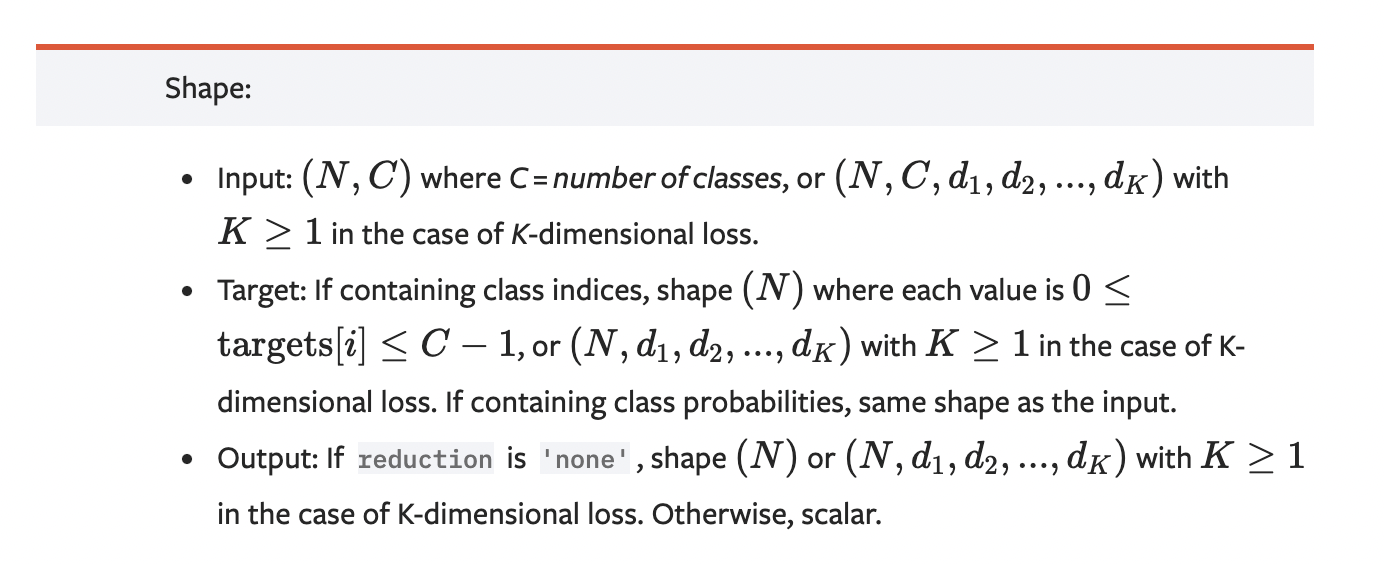

In [31]:
?nn.CrossEntropyLoss

Init signature:
nn.CrossEntropyLoss(
    weight: Union[torch.Tensor, NoneType] = None,
    size_average=None,
    ignore_index: int = -100,
    reduce=None,
    reduction: str = 'mean',
    label_smoothing: float = 0.0,
) -> None
Docstring:     
This criterion computes the cross entropy loss between input logits
and target.

It is useful when training a classification problem with `C` classes.
If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
assigning weight to each of the classes.
This is particularly useful when you have an unbalanced training set.

The `input` is expected to contain the unnormalized logits for each class (which do `not` need
to be positive or sum to 1, in general).
`input` has to be a Tensor of size :math:`(C)` for unbatched input,
:math:`(minibatch, C)` or :math:`(minibatch, C, d_1, d_2, ..., d_K)` with :math:`K \geq 1` for the
`K`-dimensional case. The last being useful for higher dimension inputs, such
as computing cross entropy loss per-

### problem 16

complete `evaluate` function in `train.py`

- it will evaluate model performance on a dev set or a test set, return overall POS accuracy and average loss per batch

- since batch size has no effect on evaluation results,  we use a constant batch size = 100 for simplicity
    
- during each iteration, 
    
    same as training: compute net outputs, save to variable `logits` and compute total batch loss, save to variable `batch_loss`
    
    but **shouldn't do backward pass to compute gradients**

- compute confusion matrix

    a confusion matrix is a matrix where row is predicted tag and columns is ground truth tag
    
    entry in row i and column j represents # tokens with ground truth POS tag i to which model mistakenly assigned POS tag j

    ```python
    if print_conf_matrix:
            print_cm(pred_list, list(itertools.chain(*test_data.labels)),
                    model.pos_tag_vocab.forms[:-1])
    ```

    it prints a confusion matrix using function `analysis.print_cm` in `analysis.py` module

    you need to populate a list `pred_list` with all predicted POS tags from **entire test dataset**

    when you create these lists, don't include any predictions for [PAD] tokens by `model.pos_tag_vocab.forms[:-1]`

    flag `print_conf_matrix` specifies whether or not print a confusion matrix at the end of evaluation

- params of `evaluate` function are most same as `train_epoch` function, but
    
    you should use `pos_tag_pad_index` to calculate `pred_list += list(logits[pos_tags != pos_tag_pad_index].argmax(dim=-1))`

# Hyperparameter tuning

- we provide 2 scripts for training a POS tagger:

    `train_mlp_model.py`: create and train an MLP model
    
    `train_rnn_model.py`: create and train an RNN model

- final step of development is to find hyperparams that result in best model for each architecture


- function `run_trial` in `train.py` module creates one trial of hyperparam tuning
    
    its params specify a particular hyperparam configuration,
    
    and run function that will train a model using specified hyperparam values and report performance on test set

    default setting: val accuracy 80% `embedding_size=20, hidden_size=10, ngram_length=5,num_hidden_layers=1
    lr=.01, batch_size=5, num_epochs=1`

hints for pr17-18

1. before set 3 hyperparam configurations

    we recommend change one param at a time
    
    and explore a wide range of values with **a short training regimen (one epoch)** `num_epochs=1` to see which best
    
    once you have found 3 hyperparam configurations that perform well after a single epoch,
    
    you can perform a full hyperparam tuning trial with a greater number of epochs for each of these configurations
    
    
2. to obtain best performance, train until **convergence**

    use enough epochs so that at the end of training,
    
    dev set accuracy no longer improves from epoch to epoch

### problem 17

- consider following hyperparams for MLP model:

    `embedding_size=20`: embedding size 
    
    `hidden_size=10`: hidden size, only relevant if >=1 hidden layer
    
    `ngram_length=5`: length of n-grams 
    
    `num_hidden_layers=1`: number of hidden layers 


- hyperparams for Adam:

    `lr=.01`: learning rate 
    
    `batch_size=5`: batch size 
    
    `num_epochs=1`: number of epochs to train the model for

- find >=3 combinations of above hyperparams that have accuracy >= 75% on dev set


- report accuracy for each of 3 hyperparam tuning trails on dev set,

    indicate which set yields best performance
    

- report accuracy on testing set of model with best accuracy on dev set

- hyperparameter setting 1: `embedding_size=20, hidden_size=10, ngram_length=5, num_hidden_layers=2, lr=.01, batch_size=5, num_epochs=40`

    The validation accuracy is 83.2%

        
- hyperparameter setting 2:  `embedding_size=20, hidden_size=10, ngram_length=3, num_hidden_layers=1, lr=.01, batch_size=5, num_epochs=40`

    The validation accuracy is 83.1%


- hyperparameter setting 3:  `embedding_size=20, hidden_size=20, ngram_length=5, num_hidden_layers=1, lr=.01, batch_size=5, num_epochs=40`

    The validation accuracy is 82.9%


- hyperparameter setting 1 has the best accuracy on dev set, which is 83.2%. This model's accuracy on testing set is 83.5%

In [ ]:
embedding_size=20, hidden_size=10, ngram_length=5,num_hidden_layers=2
lr=.01, batch_size=5, num_epochs=1

The best validation accuracy of 0.832 occurred after epoch 28.
Test. Loss: 7.72, Accuracy: 0.835

### problem 18

- for RNN model, same steps as pr 17


- hyperparams for RNN model:

    `embedding_size=20` embedding size 

    `hidden_size=10` hidden size: only relevant if >=1 RBB layer

    `rnn_type="gru"` type of RNN cell (SRN, LSTM, GRU)

    `num_rnn_layers=1` number of RNN layers
    
    `bidirectional=False` whether or not RNN operates bidirectionally


- hyperparams for Adam:

    `lr=.01` learning rate

    `batch_size=5` batch size

    `num_epochs=1` number of epochs to train the model for
    

- hyperparameter setting 1: `embedding_size=20, hidden_size=30, rnn_type="lstm", num_rnn_layers=1, bidirectional=True, num_epochs=40, batch_size=5, lr=.01`

    Validation accuracy is 85.0%


- hyperparameter setting 2: `embedding_size=20, hidden_size=30, rnn_type="lstm", num_rnn_layers=2, bidirectional=True, num_epochs=40, batch_size=5, lr=.01` 
    
     Validation accuracy is 85.5%


- hyperparameter setting 3:  `embedding_size=20, hidden_size=30, rnn_type="lstm", num_rnn_layers=3, bidirectional=True, num_epochs=40, batch_size=5, lr=.01`

     Validation accuracy is 86.6%


- hyperparameter setting 3 has the best accuracy on dev set, which is 86.6%. This model's accuracy on testing set is 85.9%

# Exploring trained RNN POS tagger

- in this final part, you will explore behavior and internal representations of RNN POS tagger


- if you don't know natural language syntax,

    you can read chapters 5-7 of Emily Bender's book: Linguistic Fundamentals for Natural Language Processing

### problem 19

- train a bidirectional RNN with set of hyperparams that gave you the best performance


- train to convergence


- once you have such a net, use `evaluate` function to compute performance on the test set, with setting `conf_matrix=True`


- look at confusion matrix for the net

    if net behaves perfectly, all of the numbers off of diagonal of confusion matrix would be 0;
    
    mean that the net didn't assign any POS tags wrong
    
    comment on nature of errors that net is making
    
    why are some POS tags more confusable for net than others?

Answer: Among the 25455 words, PRONP and NOUN (647 mistakes), ADJ and PROPN (277 mistakes), NOUN and VERB (278 mistakes) are the most common conditions that the network is confused about. The reason might be that the context for these words are similar, e.g., both PRONP "Marry" and NOUN "cat" can be used in the sentence "I played with ____.".


In [ ]:
# confusion matrix
            ADJ   ADP   ADV   AUX CCONJ   DET  INTJ  NOUN   NUM  PART  PRON PROPN PUNCT SCONJ   SYM  VERB     X 
      ADJ  1307    19    50     0     0    45     1   113     3     0     6   165     5     4     0    61     3 
      ADP     6  1885    32     0     2     5     2    16     2    12     1     8     0    42     1    15     1 
      ADV    48    41   864     0     3    26     8    27     2     6    34    20     1    43     0    24     0 
      AUX     2     7     2  1374     0     4     1     2     0     4    10     9     0    20     0    73     1 
    CCONJ     0     2     6     0   694     3     1     3     0     1     5     3     0    14     0     6     0 
      DET    18     7     8     0     4  1794     1     5     0     0    25    22     1    10     0     2     1 
     INTJ     6     5    24     0     0     6    39    10     0     0    11     6     0     9     0     3     1 
     NOUN   131    10    33     4     0     7     1  3392    17     0    25   302    14     3     2   162    33 
      NUM    11     2     4     0     0     4     1    53   318     1     3    92    22     0     0    19    11 
     PART     2     9     8     2     0     0     0     0     0   601     1     0     1     2     0     4     0 
     PRON     1     4    18     0     0    44     3    10     2     3  1990    59     1    17     0     4     2 
    PROPN   112    22    35     2     0    29     1   345    12     1    69  1219    29    13     0    57    39 
    PUNCT     3     0     2     0     0     2     0    23     7     1     0     9  3022     1    24     1     3 
    SCONJ     1    60    10     0     0     7     2     2     0     8     8     1     0   339     0     5     0 
      SYM     1     0     2     0     0     0     0     4     0     0     0     5    15     0    78     0     1 
     VERB    33    30    19    51     0    17     1   116     2     0     6    18     2    18     0  2325     2 
        X    15     3    12     0     0     3     0    22    10     0     2    47    14     1     0     4   361 


A proper noun is the name of a particular person, place, organization, or thing. Proper nouns begin with a capital letter. Examples are ' Peggy,' 'Tucson,' and 'the United Nations.


- 345: PRONP -> NOUN


- 302: NOUN -> PROPN


- 165: ADJ -> PROPN


- 162: NOUN -> VERB


- 131: NOUN -> ADJ


- 116: VERB -> NOUN


- 113: ADJ -> NOUN


- 112: PROPN -> ADJ

### problem 20

- use net from pr19, examine its POS tagging performance on specific examples,

    use `analysis.eval_sent` function, the function will run your model on a single input

    ```python
    from analysis import eval_sent

    eval_sent(model, ["the virus disappeared quickly ."])
    ```

- you must explore net's behavior on >= 2 kinds of cases

    1) sentences involving a word or words that exhibit POS ambiguity
    
        e.g., pad: I wrote on the pad VS. you should pad the matrix
    
    
    2) sentences containing novel words that net hasn't seen in its training data
    
        e.g., Lewis Carroll's poem "Jabberwocky"
        

- in both cases, net must go beyond simply memorizing a single POS tag for each word,

    and must instead use context to help determine it,


- how well does net perform in such cases?



- what kinds of context are sufficient for the net to correctly determine POS tag for such cases?

- The ambiguous words I test are "dog" and "book". The network performs well at these words. The reason might be that my test sentences have a clear Subject-Verb-Object (S-V-O) structure, which are easy for the network to distinguish between their POS taggs.
    

- The novel words I test are "fluffernutter", "astroturf" and "copypasta". They are all 2021 New Words from Merriam-Webster Dictonary (https://www.merriam-webster.com/words-at-play/new-words-in-the-dictionary). The word "fluffernutter" is NOUN - a sandwich made with peanut butter and marshmallow crème between two slices of white sandwich bread; The word "astroturf" is ADJ - falsely made to appear grassroots; The word "copypasta" is NOUN - means data (such as a block of text) that has been copied and spread widely online. The network only makes mistake on "fluffernutter", whose POS tag is predicted as PROPN. It seems that adverb "some" is more confusing than indefinite "a" for network to help with predict the POS tag for unseen words.


In [8]:
# sentences involving a word or words that exhibit POS ambiguity
from analysis import eval_sent

# dog
print(eval_sent(model, ["The sailor dogs the hatch.",  # ground truth: 'VERB', prediction 'VERB',
                        "The sailor owns the dogs near the hatch." # ground truth: 'NOUN', prediction  'NOUN'
                       ]))

# book
print(eval_sent(model, ["I book the flight.", # ground truth: 'VERB', prediction 'VERB'
                        "I read the book on the flight." # ground truth: 'NOUN', prediction 'NOUN'
                       ]))


# sentences containing novel words that net hasn't seen in its training data
 
# fluffernutter: ground truth:'NOUN', prediction: 'PROPN'
print(eval_sent(model, ["Mom made some fluffernutters for the kids."]))

# astroturf: ground truth: 'ADJ', prediction: 'ADJ'
print(eval_sent(model, ["You have an astroturf meme."]))

# copypasta: ground truth: 'NOUN', prediction: 'NOUN'
print(eval_sent(model, ["The tweet became a copypasta"]))



[['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'PUNCT'], ['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT']]
[['PRON', 'VERB', 'DET', 'NOUN', 'PUNCT'], ['PRON', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT']]
[['NOUN', 'VERB', 'DET', 'PROPN', 'ADP', 'DET', 'NOUN', 'PUNCT']]
[['PRON', 'VERB', 'DET', 'NOUN', 'ADJ', 'PUNCT']]
[['DET', 'NOUN', 'VERB', 'DET', 'NOUN']]


### problem 21

- train a unidirectional RNN

    use `bidirectional=False` flag when you create `RNNPosTagger` instance


- use best hyperpara you can find and train it to convergence


- The best validation accuracy of 0.804 occurred after epoch 22.

    Test. Loss: 8.16, Accuracy: 0.805

- perform PCA for all of hidden unit vectors that are computed during processing of **test set**


- use `make_hidden_pca` function in `analysis.py` module

    ```python
    from analysis import make_hidden_pca

    pca = make_hidden_pca(model, test_data)
    ```

    input: RNN POS tagger and a dataset (your test data)
    
    output: a PCA model fit to hidden state vectors generated by RNN

- after PCA model has been trained,

    for a sentence or list of sentences

    use `plot_sentences` in `analysis.py` to plot trajectories of net's hidden unit representations 

In [6]:
from analysis import eval_sent

print(eval_sent(model, ['The virus disappeared quickly.']))


[['DET', 'NOUN', 'VERB', 'ADV', 'PUNCT']]


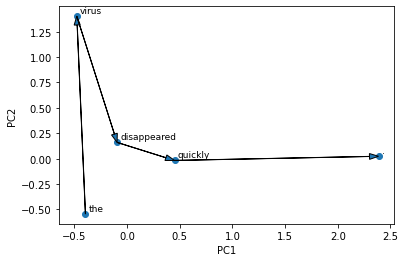

In [7]:
from analysis import plot_sentences

plot_sentences(model, pca,
              ['The virus disappeared quickly.'])

ths plot shows each of hidden state vectors produced by model, expressed by their first 2 principal components
    

use this function to examine trajectories of phrases of following kinds:

1. simple noun phrases (NPs), e.g., names (Alice), definite and indefinite descriptions (the/a student)
    

2. NPs with adjectival modifiers, e.g., the tall student, the tall happy student
    

3. NPs with prepositional phrase (PP) modifiers, e.g., the student with a dog, the student with a dog with a tail
    

4. sentences with intransitive verbs, e.g., Alice is sleeping, the student laughed
    

5. sentences with transitive verbs, e.g., The dog loves the cat, the student wanted an extension

- I tried to change the principal components used for create the plots as PC0 VS. PC2, PC1 VS. PC2 and the results are similar as that of PC0 VS. PC1.

- Does net treat all NPs the same or treat some NPs differently? Are there patterns in terms of which NPs are treated same?

    Answer: At first, the network mistakenlly predicts all the POS tag of Verb "is" to be "AUX" when NPs are "Marry", "A girl", "The girl", "A cat", "The cat" except for "Kitty". We can see the trajectory of name "Marry" and that of name "Kitty" is pretty different. In constract, the trajectory of Definite "a" and that of Definite "the" is very similar.

[['ADP', 'AUX', 'NOUN', 'PUNCT'], ['DET', 'NOUN', 'AUX', 'VERB', 'PUNCT'], ['DET', 'NOUN', 'AUX', 'VERB', 'PUNCT']]


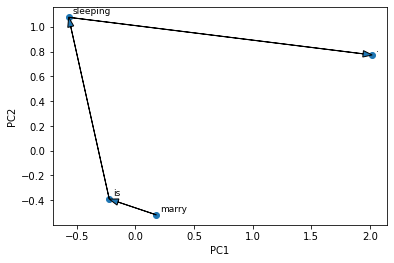

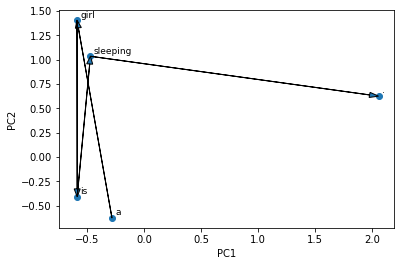

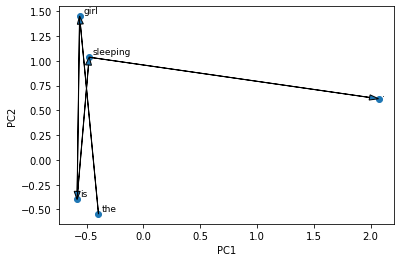

In [19]:
# simple noun phrases (NPs), 
print(eval_sent(model, ["Marry is sleeping.",
                       "A girl is sleeping.",
                       "The girl is sleeping."]))
 
plot_sentences(model, pca, ["Marry is sleeping."])
plot_sentences(model, pca, ["A girl is sleeping."])
plot_sentences(model, pca, ["The girl is sleeping."])


[['NOUN', 'VERB', 'VERB', 'PUNCT'], ['DET', 'NOUN', 'AUX', 'VERB', 'PUNCT'], ['DET', 'NOUN', 'AUX', 'VERB', 'PUNCT']]


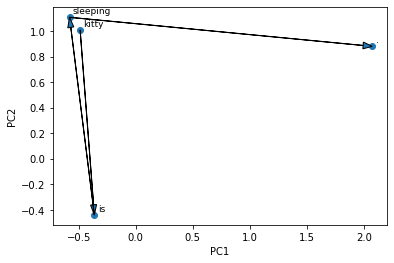

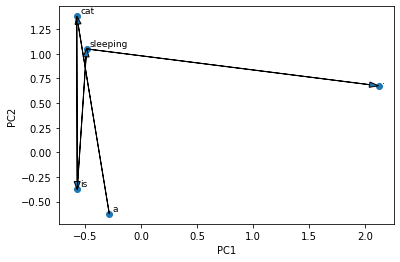

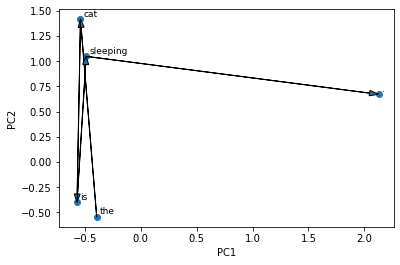

In [11]:
# simple noun phrases (NPs), 
print(eval_sent(model, ["Kitty is sleeping.",
                       "A cat is sleeping.",
                       "The cat is sleeping."]))
 
plot_sentences(model, pca, ["Kitty is sleeping."])
plot_sentences(model, pca, ["A cat is sleeping."])
plot_sentences(model, pca, ["The cat is sleeping."])


- What impact does modification by an adjective or a seq of them have on net's state?

    Answer: The trajectory of the Definite "the" and the Noun "cat" doesn't change. And as we add more Adjectives ("small", "cute", "happy") to modify the Noun "cat", the trajectory of each adjective also doesn't change. 

[['DET', 'ADJ', 'NOUN'], ['DET', 'ADJ', 'ADJ', 'NOUN'], ['DET', 'ADJ', 'ADJ', 'ADJ', 'NOUN']]


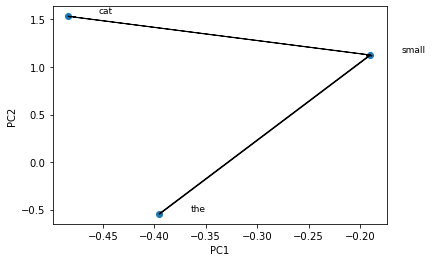

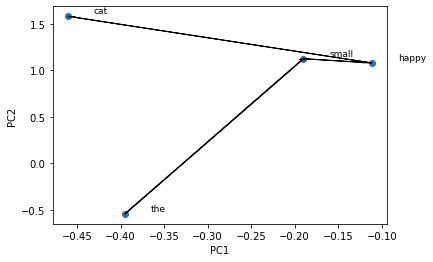

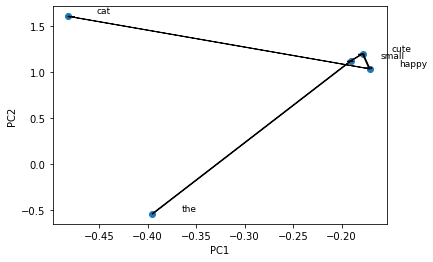

In [12]:
# NPs with adjectival modifiers
print(eval_sent(model, ["the small cat",
                        "the small happy cat",
                       "the small cute happy cat"]))

plot_sentences(model, pca, ["the small cat"])
plot_sentences(model, pca, ["the small happy cat"])
plot_sentences(model, pca, ["the small cute happy cat"])


- What impact does modification by a PP (Preposition Phrase) have on net's state?

    Answer: As we increase the PP modifier on the NP "the girl", e.g., "with a cat", "with a bow", "on its neck", the trajectory of each original NP and PPs doesn't change.

[['DET', 'NOUN', 'ADP', 'DET', 'NOUN'], ['DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN'], ['DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PRON', 'NOUN']]


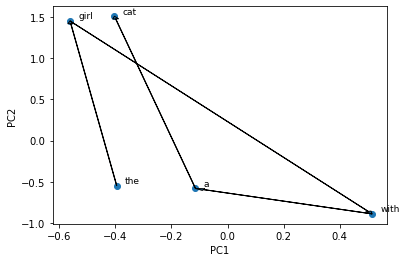

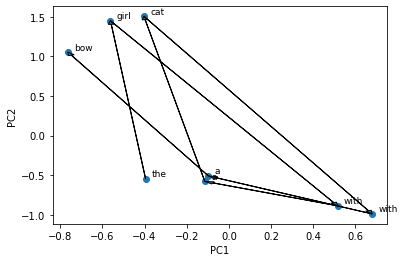

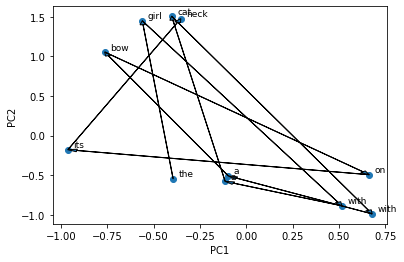

In [14]:
# NPs with prepositional phrase (PP) modifiers
print(eval_sent(model, ["the girl with a cat",
                        "the girl with a cat with a bow",
                       "the girl with a cat with a bow on its neck"]))

plot_sentences(model, pca,["the girl with a cat"])
plot_sentences(model, pca,["the girl with a cat with a bow"])
plot_sentences(model, pca,["the girl with a cat with a bow on its neck"])


- Intransitive verb vs. transitive verbs

    Answer: In my example sentences, the trajectories of each intransitive verbs ("smiled", "cried", "died") aren't exactly same but similar. That's also the case for transitive verbs ("hate", "love", "miss").

[['DET', 'NOUN', 'NOUN', 'PUNCT'], ['DET', 'NOUN', 'VERB', 'PUNCT'], ['DET', 'NOUN', 'VERB', 'PUNCT']]


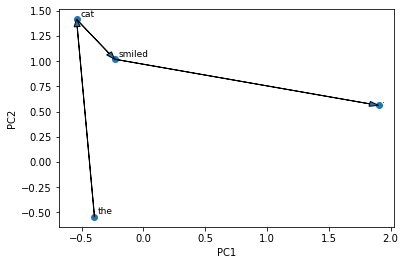

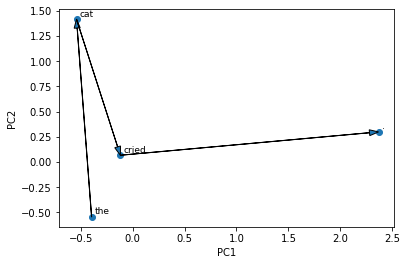

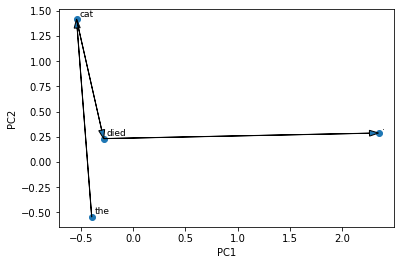

In [15]:
# sentences with intransitive verbs
print(eval_sent(model, ["The cat smiled.",
                        "The cat cried.",
                        "The cat died."
                       ]))

plot_sentences(model, pca, ["The cat smiled."])
plot_sentences(model, pca, ["The cat cried."])
plot_sentences(model, pca, ["The cat died."])

[['PRON', 'VERB', 'PRON', 'PUNCT'], ['PRON', 'VERB', 'PRON', 'PUNCT'], ['PRON', 'VERB', 'PRON', 'PUNCT']]


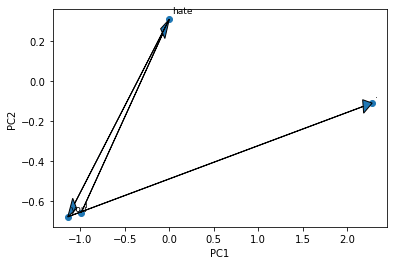

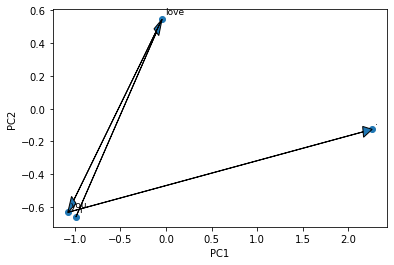

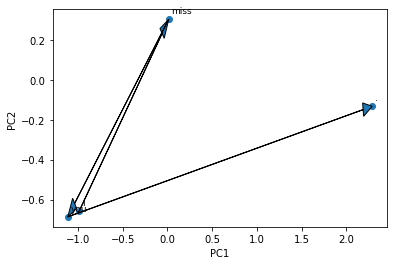

In [20]:
# sentences with transitive verbs
print(eval_sent(model, ["I hate you.",
                        "I love you.",
                        "I miss you."]))

plot_sentences(model, pca,["I hate you."])
plot_sentences(model, pca,["I love you."])
plot_sentences(model, pca,["I miss you."])

- How does trajectory of a subject NP different from that of an object NP?

    Answer: The trajectory of Nouns changes a lot but the Definites almost remain the same. E.g., in the first sentence, "The cat" serves as a subject NP while in the second sentence, it serves as an object NP. In addition, "the dog" serves as an object NP in the first sentence while it serves as a subject NP in the second sentence. From the figure we can see the trajectory of "cat" or "dog" changes a lot but trajectory of "the" is basically the same.

[['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'PUNCT'], ['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'PUNCT']]


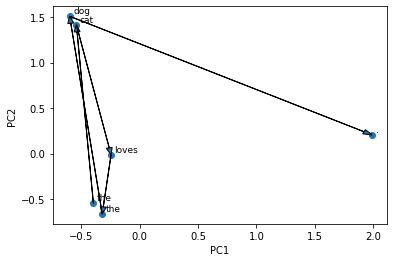

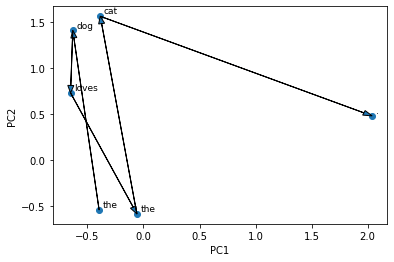

In [16]:
# subject NP VS object NP?
print(eval_sent(model, ["The cat loves the dog.",
                        "The dog loves the cat."]))

plot_sentences(model, pca,["The cat loves the dog."])
plot_sentences(model, pca,["The dog loves the cat."])

- create phrases and sentences that involve minimal variation in the word choice,

    so you can see impact of each factor on trajectory
    
    e.g, "the dog is sleeping" VS. "Fido is sleeping" compare trajectory of these 2 sentences to see how net's response to **descriptions VS. names** in the input, and their relative impact on net's state for remainder of sentence

- before plot trajectories, confirm that net correctly assigns POS to each word in your sentences


- as Elman's paper, you may look at trajectories other than first 2 principle components,

    by providing `plot_sentences` with values for its optional paras `i` and `j`, by default they're 0 and 1

- your goal is to find what net is representing about word seq as it's processing


- discuss the degree to which it represent word seqs in a way that reflects regularities of English syntax 规律性


- e.g., for NPs, does net treat all NPs the same or treat some NPs differently? are there patterns in terms of which NPs are treated same?


- what impact does modification by a PP (Preposition Phrase) or an adjective (or a seq of them) have on net's state?


- how does trajectory of a subject NP different from that of an object NP?

- change PCA principal components `i=0, j=1` -> `i=0, j=2`

[['NOUN', 'VERB', 'VERB', 'PUNCT'], ['DET', 'NOUN', 'AUX', 'VERB', 'PUNCT'], ['DET', 'NOUN', 'AUX', 'VERB', 'PUNCT']]


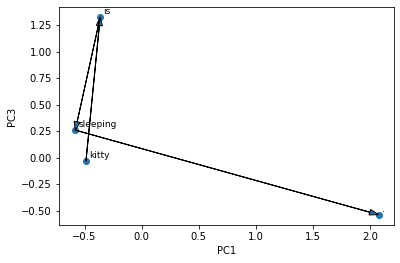

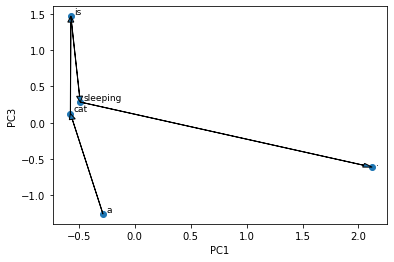

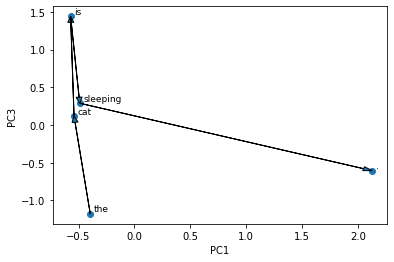

In [21]:
# simple noun phrases (NPs), 
print(eval_sent(model, ["Kitty is sleeping.",
                       "A cat is sleeping.",
                       "The cat is sleeping."]))

plot_sentences(model, pca, ["Kitty is sleeping."], i=0, j=2)
plot_sentences(model, pca, ["A cat is sleeping."], i=0, j=2)
plot_sentences(model, pca, ["The cat is sleeping."], i=0, j=2)


In [ ]:
# simple noun phrases (NPs), 
print(eval_sent(model, ["Kitty is sleeping.",
                       "A cat is sleeping.",
                       "The cat is sleeping."]))

plot_sentences(model, pca, ["Kitty is sleeping."], i=0, j=2)
plot_sentences(model, pca, ["A cat is sleeping."], i=0, j=2)
plot_sentences(model, pca, ["The cat is sleeping."], i=0, j=2)


# NPs with adjectival modifiers
print(eval_sent(model, ["the small cat",
                        "the small happy cat",
                       "the small cute happy cat"]))

plot_sentences(model, pca, ["the small cat"], i=0, j=2)
plot_sentences(model, pca, ["the small happy cat"], i=0, j=2)
plot_sentences(model, pca, ["the small cute happy cat"], i=0, j=2)


# NPs with prepositional phrase (PP) modifiers
print(eval_sent(model, ["the girl with a cat",
                        "the girl with a cat with a bow",
                       "the girl with a cat with a bow on its neck"]))

plot_sentences(model, pca,["the girl with a cat"], i=0, j=2)
plot_sentences(model, pca,["the girl with a cat with a tail"], i=0, j=2)
plot_sentences(model, pca,["the girl with a cat with a bow on its neck"], i=0, j=2)


# sentences with intransitive verbs
print(eval_sent(model, ["The cat smiled.",
                        "The cat cried.",
                        "The cat died."
                       ]))

plot_sentences(model, pca, ["The cat smiled."], i=0, j=2)
plot_sentences(model, pca, ["The cat cried."], i=0, j=2)
plot_sentences(model, pca, ["The cat died."], i=0, j=2)

# sentences with transitive verbs
print(eval_sent(model, ["The cat hates the dog.",
                        "The cat loves the dog.",
                        "The cat bites the dog."]))

plot_sentences(model, pca,["The cat hates the dog."], i=0, j=2)
plot_sentences(model, pca,["The cat loves the dog."], i=0, j=2)
plot_sentences(model, pca,["The cat bites the dog."], i=0, j=2)

# subject NP VS object NP?
print(eval_sent(model, ["The cat loves the dog.",
                        "The dog loves the cat."]))

plot_sentences(model, pca,["The cat loves the dog."], i=0, j=2)
plot_sentences(model, pca,["The dog loves the cat."], i=0, j=2)

- change PCA principal components

`i=0, j=1` -> `i=1, j=2`

In [ ]:
# simple noun phrases (NPs), 
print(eval_sent(model, ["Kitty is sleeping.",
                       "A cat is sleeping.",
                       "The cat is sleeping."]))

plot_sentences(model, pca, ["Kitty is sleeping."], i=1, j=2)
plot_sentences(model, pca, ["A cat is sleeping."], i=1, j=2)
plot_sentences(model, pca, ["The cat is sleeping."], i=1, j=2)


# NPs with adjectival modifiers
print(eval_sent(model, ["the small cat",
                        "the small happy cat",
                       "the small cute happy cat"]))

plot_sentences(model, pca, ["the small cat"], i=1, j=2)
plot_sentences(model, pca, ["the small happy cat"], i=1, j=2)
plot_sentences(model, pca, ["the small cute happy cat"], i=1, j=2)


# NPs with prepositional phrase (PP) modifiers
print(eval_sent(model, ["the girl with a cat",
                        "the girl with a cat with a bow",
                       "the girl with a cat with a bow on its neck"]))

plot_sentences(model, pca,["the girl with a cat"], i=1, j=2)
plot_sentences(model, pca,["the girl with a cat with a tail"], i=1, j=2)
plot_sentences(model, pca,["the girl with a cat with a bow on its neck"], i=1, j=2)


# sentences with intransitive verbs
print(eval_sent(model, ["The cat smiled.",
                        "The cat cried.",
                        "The cat died."
                       ]))

plot_sentences(model, pca, ["The cat smiled."], i=1, j=2)
plot_sentences(model, pca, ["The cat cried."], i=1, j=2)
plot_sentences(model, pca, ["The cat died."], i=1, j=2)

# sentences with transitive verbs
print(eval_sent(model, ["The cat hates the dog.",
                        "The cat loves the dog.",
                        "The cat bites the dog."]))

plot_sentences(model, pca,["The cat hates the dog."], i=1, j=2)
plot_sentences(model, pca,["The cat loves the dog."], i=1, j=2)
plot_sentences(model, pca,["The cat bites the dog."], i=1, j=2)

# subject NP VS object NP?
print(eval_sent(model, ["The cat loves the dog.",
                        "The dog loves the cat."]))

plot_sentences(model, pca,["The cat loves the dog."], i=1, j=2)
plot_sentences(model, pca,["The dog loves the cat."], i=1, j=2)